# **Introduction**
---

**Clustering** is a type of **unsupervised learning algorithm** that involves **grouping similar data points** together based on their characteristics. The **goal of clustering** is to **find similarities** within a **dataset** and **group similar data points together** while keeping **dissimilar data points separate**.

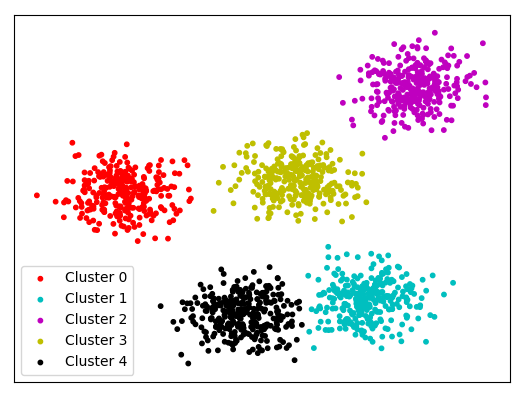

**About Dataset**
---

**Shop Customer Data** is a comprehensive dataset that provides a **detailed analysis** of a **hypothetical shop's ideal customers**. By collecting and analyzing customer data through **membership cards**, this dataset provides valuable insights that can help a **business better understand its customers**.

The dataset includes **2000 records and 8 columns**, providing a **wealth of information** about the **shop's customer base**. Each column represents a specific aspect of the customer's profile, including their **unique Customer ID, Gender, Age, Annual Income, Spending Score, Profession, Work Experience, and Family Size.**

By analyzing this data, businesses can gain **valuable insights** into their **customers' preferences**, **behaviors, and purchasing habits**. For example, they can **segment customers** by **age, income, or family size** to better understand how these factors impact their purchasing decisions.

* **Customer ID**: A unique identifier assigned to each customer in the dataset. It is used to differentiate between individual customers and to keep track of their purchases and other behaviors.

* **Gender**: The gender of the customer, either male or female. Gender can be used to analyze purchasing behavior and preferences between genders.

* **Age**: The age of the customer, usually measured in years. Age can be used to segment customers into different age groups, which can help identify purchasing patterns and preferences among different age groups.

* **Annual Income**: The annual income of the customer, usually measured in dollars or another currency. Annual income can be used to segment customers into different income groups, which can help identify purchasing patterns and preferences among different income levels.

* **Spending Score**: A score assigned by the shop based on the customer's behavior and spending nature. This score can be used to segment customers based on their purchasing patterns, such as high-spending customers, low-spending customers, and customers who are likely to make impulse purchases.

* **Profession**: The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.

* **Work Experience**: The number of years of work experience of the customer. This feature can be used to segment customers based on their level of experience, which can help identify purchasing patterns and preferences among different experience levels.

* **Family Size**: The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns and preferences among different family sizes, such as families with children versus families without children.

# **Set Up**

---

To prepare for **data loading, preprocessing, and model building,** it's essential to import all necessary modules and **set hyperparameters and constraints**. These parameters will be used throughout the notebook to **ensure consistency and accuracy in the analysis**.

In [1]:
# Data
import numpy as np
import pandas as pd

# Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score


# **Data Loading & Processing**
---

In [2]:
# Specify the data path
data_path = 'Customers.csv'

# Read the file 
df = pd.read_csv(data_path) # (df is abbreviation for Data Frame)

# Quick look at the data 
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


Let's have a look at the **feature space**.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [4]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

The data under consideration comprises of 2 categorical and 5 numeric features. Of the numeric features, all except the **"profession"** attribute are **fully populated**, indicating **no missing values**. However, the **"profession feature"** exhibits a **limited amount of missing data**, with approximately **35 null values**. It is important to note that the **presence of null values**, particularly in a **categorical feature**, may require **imputation or removal** to **ensure the integrity and accuracy** of subsequent data analyses.

Because this is a **categorical column**, we will be imputing the value using the **mode value**.

In [5]:
# Inpute the missing value by the Model Value
df.Profession.fillna('mode', inplace=True)

# Quick check
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

**Excellent!** With the **null values successfully eliminated**, we may proceed towards **data visualization** and **subsequent data processing**. Prior to commencing with additional **data preprocessing procedures**, it is advisable to **perform data visualization** to gain a **better understanding** of the **underlying patterns and relationships within the dataset**.

# **Data Visualization**
---

**Data visualization** is a process of **creating visual representations** of data to facilitate the **exploration, interpretation, and communication of patterns** and **relationships within the data**. It is a **powerful tool** for **understanding complex data** and **communicating insights effectively**.

In [6]:
# Obtain the count of each gender in the dataset
gender_count = df['Gender'].value_counts()

# Create a pie chart to visualize the distribution of gender in the dataset
fig = px.pie(values=gender_count, names=gender_count.index)

# Enhance the plot by adding a title and labels
fig.update_layout(title="Distribution of Gender in the Dataset")

# Create a bar chart to visualize the distribution of gender in the dataset 
fig2 = px.bar(y=gender_count, x=gender_count.index, color=gender_count.index)

# Display the plot
fig.show()
fig2.show()

It is evident from the dataset that the **number of female candidates** is **significantly higher** than the **number of male candidates**, indicating a **bias** towards the **female gender**. Specifically, the dataset contains around **1,200 female candidates** and only approximately **800 male candidates**.

It is important to note that such a **bias** can **potentially impact** the **performance of machine learning models** trained on this dataset. This is **particularly true** if the dataset is used to **predict outcomes** or **make decisions** that **may be influenced by gender**.

Let's find out how the gender is affecting the other features.

In [7]:
# Create a box plot of Age by Gender
age_gender_boxplot = px.box(df, x='Gender', y='Age', color='Gender', title='Distribution of Age by Gender')

# Display the plot
age_gender_boxplot.show()

The **box plot** provides **clear insights** into the **distribution of age by gender**. From the plot, it is **evident** that **gender does not appear to significantly impact the distribution of age**. Both **male and female genders** have **similar age distributions with no significant differences.**

In [8]:
# Create a box plot of Age by Gender
anual_income_gender_boxplot = px.box(df, x='Gender', y='Annual Income ($)', color='Gender', title='Distribution of Anual Income ($) by Gender')

# Display the plot
anual_income_gender_boxplot.show()

The **distribution of annual income** versus **gender** is similar to the **distribution of age versus gender**. There is **no significant impact** of **gender on the annual income**. And that is **really great to be see**. 

---
After performing exploratory data analysis on **"Gender"** feature, we can conclude that there is **no strong correlation** between the **gender distribution** and **any other feature**(You can try plotting curves yourself). This suggests that **gender** is **not a significant factor** when **predicting the values** of other variables. This conclusion is **important from a machine learning perspective** because it implies that **including gender as a feature** in a **predictive model may not lead to significant improvements in accuracy**. It also indicates that there may be **other factors** that are **more influential** in determining the **values of these variables**. Further analysis, such as generating a **correlation matrix** or **performing feature engineering**, may be necessary to **identify these factors** and **improve the accuracy of our models**.

In [9]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Age', marginal='violin')

# Display the plot
fig.show()

Upon analyzing the **age distribution** of the **dataset**, we observe that it is **fairly uniform** across the **entire age range**, ranging from **0 to 100**. Despite a **small peak** in the **age range of 30-34**, which **deviates slightly from a normal distribution**, it **still falls within an acceptable range**. Thus, from a **statistical perspective**, we can conclude that the **data is not skewed or biased with respect to age**.

Furthermore, from a **machine learning and deep learning point of view**, it is essential to have a **balanced dataset** that covers **all age groups to ensure optimal model performance**. Therefore, this **balanced distribution of age** can be **beneficial** for building **accurate and robust models** that can **generalize well on unseen data**.

In [10]:
# Create violin plot for Age versus Profession
fig1 = px.violin(df, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

# Create box plot for Age versus Profession
fig2 = px.box(df, x='Age', y='Profession', color='Profession', title='Age Distribution across Professions')

# Display the plots
fig1.show()
fig2.show()

By examining the **age distribution** of different professions through a **violin plot**, we can observe that there is **no significant difference** in the **age distribution across professions**. This is **surprising**, as one would expect that certain **professions** might have an **age bias** due to **factors such as education and experience requirements.** However, the **data suggests otherwise**, and it may be the case that the **distribution of customers in the dataset is such that each profession is equally represented regardless of age**. This is an **interesting finding**, and it suggests that **age may not be a decisive factor in predicting the profession of a customer**.

---
Upon analyzing the **box plot**, it can be **inferred** that **age is slightly related to the profession**(unlike the violin plot). The **distribution of age** for **different professions** is **not uniform** and there are **variations** in the **age distribution across professions**. From a **machine learning and deep learning point of view**, these **observations** can be **crucial in predicting** the **profession of an individual based on their age**.

Additionally, it is **worth noting** that the median of the **age distribution varies across professions**. For instance, the median for **engineers** is **shifted towards the right**, indicating that the **majority of engineers** are in their **60s.** On the other hand, the mode for **marketing** and **homemakers** is **shifted towards the left**, indicating that the **majority of individuals** in these professions are in their **40s.** This information can be valuable in **developing marketing strategies** for **products or services that are specific to a particular age group or profession**.

In [11]:
# Create a density contour plot to show the relationship between age and work experience
fig1 = px.density_contour(df, x='Age', y='Work Experience', title='Density Contour Plot')

# Create a density heatmap to show the distribution of age and work experience
fig2 = px.density_heatmap(df, x='Age', y='Work Experience', title='Density Heatmap')

# Show the plots
fig1.show()
fig2.show()

The **density contour plot** between **age and work experience** reveals an **interesting trend** - **work experience does not seem to increase proportionally with age**. This is **not in line** with what we would **normally expect** in the **real world**, where **more work experience generally comes with age**. It's possible that the dataset is **too ideal and doesn't accurately reflect the real-world distribution**. Alternatively, there may be **other factors** at play that **affect work experience regardless of age, such as changes in career paths or education.** 

In [12]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Annual Income ($)', marginal='violin')

# Display the plot
fig.show()

Upon analyzing the histogram of the annual income, a **conspicuous pattern emerges**. Notably, the **count of individuals** earning between **zero to 50,000** is **minuscule**, amounting to **merely 15**. The data shows that a **substantial shift occurs** after the **50,000 mark**, where the **count skyrockets to around 70**. This **increasing trend continues** in a **linear fashion** until it reaches the **100,000 mark**, after which some **fluctuations are observed**. These **perturbations persist until the income range of 190,000**.

In [13]:
# Create a box plot for annual income grouped by profession
fig = px.box(df, y='Annual Income ($)', x='Profession', color="Profession")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

Upon further analysis of the relationship between **annual income and profession**, it appears that the **distribution of income** for **certain professions** such as **healthcare, engineering, law, entertainment, art, executive and medicine, remains relatively stable.** However, there are some **notable changes** in the distribution of **income for individuals** in the **home-making profession**, where the **lower values tend to shift slightly higher.**

Furthermore, the **median income** for the **aforementioned professions** remains **relatively consistent** at **approximately 100K,** whereas the **median income for individuals** in the **home-making profession experiences a slight decrease**. On the other hand, the **marketing profession** experiences a **notable change**, with the **overall distribution of income remaining consistent**, yet the **median income shifting upwards**.

In [14]:
# Create a histogram of the 'Age' column, and include the Violin plot to show the distribution
fig = px.histogram(df, x='Spending Score (1-100)', marginal='box')

# Display the plot
fig.show()

Upon examining the **histogram** of the **spending score**, it becomes apparent that the **frequency counts are roughly consistent throughout**. However, there exists a **notable peak** in the **frequency count** within the range of **45 to 49** in the **spending score**. This **peak exhibits** a **gradual incline**. As we progress towards the end of the histogram, the **frequency count** experiences an **extreme decline**, dropping to a **mere 18**. The **initial frequency count** stood around **80 and peaked at 134** before **dropping to 18**, marking a **significant variation** in the **counts**. Despite these fluctuations, the **distribution maintains a consistent trend, gradually shifting upwards and downwards**.

In [15]:
# Extracting the count of each profession from the dataframe and storing in profession_dis
profession_dis = df.Profession.value_counts()

# Extracting the names of each profession from the profession_dis index
names = profession_dis.index

# Creating a pie chart to visualize the distribution of profession data values
fig = px.pie(values=profession_dis, names=names, color=names)

# Setting the title of the plot
fig.update_layout(title_text='Distribution of Profession Data Values')

# Displaying the plot
fig.show()

To give an overview of the **distribution of customers across professions** in the dataset, it can be observed that around **30% of the total customers** are **classified as artists**. **Healthcare professionals** cover around **17% of the total customers**, making it the **second-largest group**. The **entertainment industry** follows closely, with around **11.7% of the total customers**. However, **homemakers** constitute the **least fraction of customers**, with **only 3% of the total customers belonging to this category**. 

Examining the distribution of the **homemaker profession**, it was **unsurprising** to find that they had the **lowest count**, considering that **homemaking** is **no longer the primary occupation** of **women in modern society**. However, it was **unexpected** to see such a **sharp increase** in the **artist profession**, which comprises the **largest portion** of customers at **approximately 30%.** While it is **often believed** that **engineering professions** are **more prevalent** than others, the **predominance** of **artists** in the dataset is **noteworthy and indicates the growing significance of art and creative expression in modern society**.

In [16]:
# Create a box plot for annual income grouped by profession
fig = px.box(df, y='Work Experience', x='Profession', color="Gender")

# Set the title of the plot
fig.update_layout(title_text='Annual Income Distribution by Profession')

# Show the plot
fig.show()

Upon analyzing the **box plot** for **work experience across different professions**, several **important insights** can be observed. 

* Notably, the **healthcare, executive, doctor, and marketing** department have a **higher overall range of work experience** compared to other sectors. However, it is worth noting that the **lawyer and entertainment sectors** have a **median work experience** of **only one year**, which is **relatively low**. While the distribution for both sectors is reasonable, starting at a **low of one year and going up to around seven years**, the **median values are not satisfactory**. 

* In contrast, the **healthcare, executive and doctor's median work experience range** from **one year to around eight years**, which is expected given the **nature of their work**. Although the **median experience for doctors is lower than healthcare and executive departments**, standing at just **two years, which is again unsatisfactory**.

* Furthermore, **some exceptional outliers** can be observed in the data, such as the **professional with a work experience of 17 years** in the **lawyer and artist sectors, which is impressive**. However, the most crucial aspect that deserves attention is the **homemaker profession**, which has a significantly **higher range of work experience**, starting from around **three years and going up to nine years**. This is **not surprising**, as once someone enters this profession, they are **less likely to leave it for an extended period.** Moreover, the **median value is also high**, with **the maximum median value** in the **whole distribution** being around **seven years**. This indicates that individuals in this profession are **likely to work for at least seven years**.

* When considering **gender differences**, noticeable variations can be observed in the data distribution. The **median value** changes **significantly** for some professions when comparing **males and females**. For instance, in **healthcare**, the **median value is low for females and high for males**. This could be due to the **profession of nurse and doctor**, where **doctors are generally perceived as male**, and **nurses as female**.

* Interestingly, in engineering, the **median experience value** for **females is much higher** than that of **males**. **Females have a median work** experience value of **four years**, while **males have only around one or two years**. Similarly, **for doctors**, **females have a work experience of one year, whereas males have three years**, even though the **overall range is roughly the same**. 

* Lastly, for the **homemaker profession**, the **top values** for **both men and women** are the same, but the **bottom values differ**. It appears that **men start as homemakers earlier than women**, with a **work experience of around two years**, while women have a **lowest work experience of four years**. Nonetheless, the **median value is the same for both genders**.

----
Upon analyzing the data set, it seems that there are no significant data distributions or new insights to be found. I have created several plots, but none of them have uncovered any groundbreaking information.

# **Data Preprocessing**
----

Now that we have a **good understanding** of **how the data is distributed** and what **insights** it represents, we can move on to the **crucial step** of **data preprocessing.** This step involves **cleaning and transforming** the **data to prepare it for analysis.** 

To start with data preprocessing, we need to **first address** the **categorical columns** in the dataset. Since most **machine learning models** work with **numeric data**, we need to **convert categorical data into numeric values**. One way to do this is by using the **Label Encoder** from the **scikit-learn** library, which assigns **a unique numerical label to each category in a column**. This process allows us to represent categorical data as a sequence of numbers that can be easily processed by machine learning algorithms.

In [17]:
# define the categorical columns.
categorical_columns = ['Gender', 'Profession']

# define the remarkable columns.
numerical_columns = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']

In [18]:
# Convert or categorical columns to numerical columns.
for cat_col in categorical_columns:
    
    # Initialise label encoder.
    encoder = LabelEncoder()
    
    # Apply transformation.
    df[cat_col] = encoder.fit_transform(df[cat_col])

In [19]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,1,19,15000,39,5,1,4
1,2,1,21,35000,81,2,3,3
2,3,0,20,86000,6,2,1,1
3,4,0,23,59000,77,7,0,2
4,5,0,31,38000,40,3,2,6


It is recommended to perform **feature scaling** on the dataset to bring all the **feature columns** to a **standard range**. This is because the current range of each **feature column** is different from the other **feature columns**, which can have a **significant impact** on the **model's performance**. To achieve this, the **standard scaler** can be used, which is a **popular method for scaling numerical data.**

In [20]:
# Initialise standard scalar.
scaler = StandardScaler()

# Rescaled data.
df.drop(columns=['CustomerID'], inplace=True)
full_data = scaler.fit_transform(df)

In [21]:
# Quick Look
full_data[:5]

array([[ 1.20706357, -1.05408932, -2.09350095, -0.42833854,  0.77835593,
        -0.79120713,  0.11749744],
       [ 1.20706357, -0.98372287, -1.65613312,  1.07554599, -0.35434734,
        -0.28116224, -0.39005088],
       [-0.82845678, -1.0189061 , -0.54084515, -1.6099621 , -0.35434734,
        -0.79120713, -1.40514752],
       [-0.82845678, -0.91335643, -1.13129172,  0.93231889,  1.53349144,
        -1.04622958, -0.8975992 ],
       [-0.82845678, -0.63189066, -1.59052794, -0.39253176,  0.02322042,
        -0.53618469,  1.13259408]])

We have completed the necessary pre processing steps. Now we can move towards model building.

# **Data Correlation**

In [22]:
# Calculate correlation
corr = df.corr()

# Create the correlation matrix heatmap
fig = go.Figure(data=go.Heatmap(
                   z=corr.values,
                   x=corr.columns,
                   y=corr.columns,
                   colorscale='Viridis',
                   colorbar=dict(title='Correlation')))

# Update heatmap layout
fig.update_layout(title='Correlation Matrix Heatmap',
                  xaxis=dict(side='top'))

# Show the figure
fig.show()


Certainly. From the **correlation matrix**, we can observe that there are **no strong correlations** between the features in the data set. There are **no negative or positive correlations present,** and the values between **each feature pair are close to zero**. This indicates that the data features are **not correlated** with each other, and there may be a **problem with the dataset.** This could make it difficult for a **model to accurately identify the clusters or patterns present in the data**.

This **lack of correlation** is **not something we typically observe in real-world data sets.** In real-world scenarios, the **features are usually more interrelated**, and a **correlation matrix typically displays stronger positive or negative correlations between features**. This suggests that there may be **underlying factors affecting the data** that we have not accounted for. In order to **better understand the data** and improve our results, we may need to **conduct further exploratory analysis and feature engineering to uncover these factors.**

# **Principal Component Analysis**
---

**PCA (Principal Component Analysis)** is a **statistical technique** used to **simplify complex data sets by reducing the number of variables** while retaining the **important information.** It is a **popular technique** in **data analysis** and **machine learning** for **feature extraction, dimensionality reduction, and data visualization**.

The goal of **PCA** is to **identify** the **patterns in high-dimensional data** by identifying a **new set of variables**, called **principal components**, that **account for most of the variance in the data**. These components are **linear combinations** of the **original variables** and are computed in such a way that the **first principal component has the highest possible variance**, and **each succeeding component** in turn has the **highest variance possible** under the **constraint** that it is **orthogonal to the preceding components**.

**PCA** works by finding the **eigenvectors and eigenvalues** of the **covariance matrix of the data**. The **eigenvectors** represent the **directions** of **maximum variance in the data**, and the **eigenvalues** represent the **amount of variance explained by each eigenvector**. The **eigenvectors** with the **highest eigenvalues are the principal components**.

By projecting the data **onto the principal components**, we can obtain a **lower-dimensional representation** of the **data** that captures most of the **important information**. This can be useful for **visualization**, as it allows us to **plot the data** in **two or three dimensions**, which can be easier to interpret than high-dimensional data. It can also be useful for **reducing the dimensionality of the data** before applying other **machine learning algorithms**, as it can help to **reduce overfitting and improve computational efficiency.**

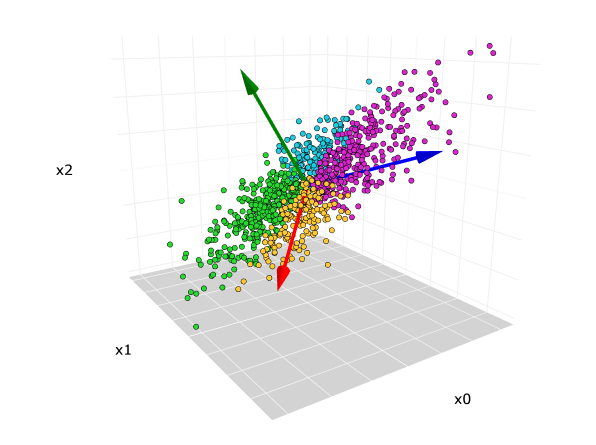

In [23]:
# Instantiate a PCA object with 2 components for 2D data
pca_2D = PCA(n_components=2, random_state=42)

# Fit and transform the data to obtain the 2D projection
data_2D = pca_2D.fit_transform(full_data)


# Instantiate a PCA object with 3 components for 3D data
pca_3D = PCA(n_components=3, random_state=42)

# Fit and transform the data to obtain the 3D projection
data_3D = pca_3D.fit_transform(full_data)

# **K-Means Clustering**
---

**K-means clustering** is a **popular unsupervised machine learning algorithm** that aims to group **similar data points together** in a dataset. The algorithm takes in a dataset and the **desired number of clusters (k),** then it **randomly selects k data points** to serve as the **initial centroids** for the **clusters**. It then assigns **each data point** in the dataset to the **nearest centroid,** creating **k clusters**.

Next, the **algorithm computes the mean (center)** of **each cluster** and **moves the centroid** to this **new location**. It then **re-assigns each data point to the nearest centroid again**, and **repeats the process of computing new cluster means** and **re-assigning data points** until the **centroids no longer move** or a **maximum number of iterations is reached**.

The output of the **K-means algorithm** is the **final centroids** and the **assignment of each data point to its corresponding cluster**. The goal of the algorithm is to **minimize the sum of squared distances** between **each data point and its assigned centroid**, known as the **Within-Cluster Sum of Squares (WCSS).**

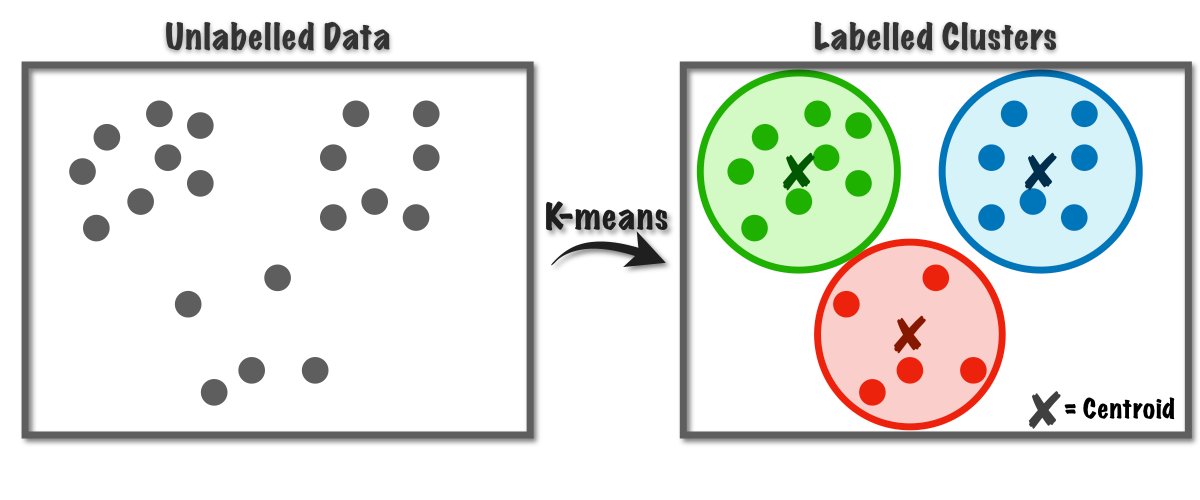

Here we are not sure about the correct number of clusters, so we will have to find the best possible value of "K"

In [24]:
# create a list to store the sum of squared distances for each k
ssd = []

# fit KMeans clustering with different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    ssd.append(kmeans.inertia_)

# create a dataframe with the k values and corresponding ssd
df = pd.DataFrame({'k': range(1, 11), 'ssd': ssd})

# create the line plot using Plotly Express
fig = px.line(df, x='k', y='ssd', title='Elbow Method')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

## **Elbow Method**
---

The **Elbow method** is a **heuristic** used to **determine the optimal number of clusters** to use in a **K-means clustering algorithm.** The method involves plotting the **explained variation** as a function of the **number of clusters** and picking the **elbow** of the **curve as the number of clusters to use**. The **explained variation** is defined as the **Sum of Squared Distances** between the **data points and their assigned cluster centers**, also known as the **Within-Cluster Sum of Squares (WCSS)**.

The intuition behind the **Elbow method** is that as the **number of clusters increases**, the **WCSS** will **generally decrease** because each **data point will be closer** to its **assigned cluster center**. However, **beyond a certain point**, the **marginal gain** in **WCSS reduction** will start to **diminish**, resulting in a **flattening of the curve**. This **point of flattening** is referred to as the **"elbow,"** and it represents the **optimal number of clusters to use**.

In [25]:
# create a list to store the silhouette scores for each k
silhouette_scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(full_data)
    silhouette_avg = silhouette_score(full_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# find the k with the highest silhouette score
best_k = np.argmax(silhouette_scores) + 2

# plot the silhouette scores vs k
fig = px.line(x=range(2, 11), y=silhouette_scores, title='Silhouette Method')
fig.update_layout(xaxis_title='Number of Clusters (k)', yaxis_title='Silhouette Score')
fig.add_vline(x=best_k, line_dash='dash', line_color='red', annotation_text=f'Best k: {best_k}')
fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

## **Silhouette Method**
---

The **Silhouette Method** is a technique for **evaluating the performance** of **clustering algorithms**. It measures how **similar a data point** is to its **own cluster** compared to **other clusters**. It provides a score for each data point, which ranges from **-1 to 1**, where:

* A score of **1** indicates that the data point is **well-matched to its own cluster**,
* A score of **0** indicates that the data point is **on the boundary between two clusters**,
* A score of **-1** indicates that the data point is **probably assigned to the wrong cluster**.

The **Silhouette score** for a **clustering solution** is calculated by **averaging the Silhouette scores** for **each data point** in the **dataset**. The higher the **average Silhouette score**, the **better the clustering solution**.

The **Silhouette Method** involves calculating the **Silhouette score** for **different values of the number of clusters,** k. The **optimal number of clusters** is chosen based on the **highest Silhouette score**. The Silhouette Method can be used in conjunction with the **Elbow Method** to determine the **best number of clusters for a given dataset**.

The **Silhouette score** for a **single data point** i is calculated as follows:

* Compute the **average distance** between **i and all other points** in its **cluster**. Denote this value as **a(i).**
* Compute the **average distance between i and all other points in the nearest neighboring cluster**. Denote this value as **b(i).**
* Calculate the **silhouette score** for i as **s(i) = (b(i) - a(i)) / max(a(i), b(i))**

The overall **Silhouette score** for a **clustering solution** is the **average of all Silhouette scores for each data point**.

In [26]:
# create a list to store the Calinski-Harabasz scores for each k
scores = []

# fit KMeans clustering with different values of k
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(full_data)
    score = calinski_harabasz_score(full_data, kmeans.labels_)
    scores.append(score)

# create a dataframe with the k values and corresponding scores
df = pd.DataFrame({'No. of clusters(k)': range(2, 11), 'Calinski-Harabasz Score': scores})

# create the line plot using Plotly Express
fig = px.line(df, x='No. of clusters(k)', y='Calinski-Harabasz Score', title='Calinski-Harabasz Index')
fig.update_traces(mode='markers+lines', marker=dict(size=8))
fig.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

## **Calinski-Harabasz Index**
---

The **Calinski-Harabasz Index**, also known as the **Variance Ratio Criterion**, is a **clustering evaluation metric** that aims to measure the **ratio between the within-cluster dispersion and the between-cluster dispersion**.

The **within-cluster dispersion** refers to the **average distance** between each data point in a **cluster and the centroid of that cluster**. The **between-cluster dispersion**, on the other hand, refers to the **average distance** between the **centroids of each cluster**.

The formula for the Calinski-Harabasz Index is:

$CH(k) = \frac{B(k)/(k-1)}{W(k)/(n-k)}$

where **CH(k)** is the **Calinski-Harabasz Index** for a given value of **k** (number of clusters), **B(k)** is the **between-cluster dispersion**, **W(k)** is the **within-cluster dispersion,** and **n** is the **total number of data points**.

The **Calinski-Harabasz Index** tries to **maximize** the **ratio** between the **between-cluster dispersion** and the **within-cluster dispersion.** A **higher value** of the **Calinski-Harabasz Index** indicates a **better clustering solution.**

In practice, the **Calinski-Harabasz Index** can be used together with other **clustering evaluation metrics**, such as the **Silhouette Coefficient** and the **Elbow Method**, to determine the **optimal number of clusters for a given dataset.**

----
Based on all the scores obtained, we can say that **"2"** is the **best value** for **K(number of clusters)**.

In [27]:
# KMeans Clustering 
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model on train_ds
kmeans.fit(full_data)

# Obtain cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [28]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter3d(
        x=centroids[:,0],
        y=centroids[:,1],
        z=centroids[:,2],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=10,
            color='orange',
            opacity=0.8,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()


In [29]:
# Create the 2D scatter plot
fig = px.scatter(
    x=data_2D[:, 0], y=data_2D[:, 1],
    color=labels,
    size_max=5, 
    opacity=0.7,
    labels={'x':'X', 'y':'Y'},
    color_continuous_scale=['black', 'cyan'])

# Add a trace for the cluster centers
fig.add_trace(
    go.Scatter(
        x=centroids[:,0],
        y=centroids[:,1],
        mode='markers+text',
        text=['Centroid 1', 'Centroid 2'],
        marker=dict(
            size=20,
            color='orange',
            opacity=1.0,
            symbol='diamond'
        )
    )
)

# Update the layout
fig.update_layout(
    coloraxis_showscale=False,
    title='K Means Clustering Visualization'
)

# Show the plot
fig.show()


Based on the results of the **K-means clustering algorithm**, we can infer that it **struggled** to **cluster the data points effectively**, with **only two centroids identified**. Upon visualizing these centroids in both **three-dimensional and two-dimensional space**, we can see that the **clusters lack a clear boundary** and are therefore **not well separated**. 

Instead, the **clusters appear to be mixed together**, indicating that the **algorithm failed** to capture the **underlying structure of the data.** While it is promising to find at **least two clusters in the higher-dimensional feature space**, we must acknowledge that the **data may not represent reality as it lacks diversity.**

# **DBSCAN**
---

**DBSCAN** (**Density-Based Spatial Clustering of Applications with Noise**) is a **clustering algorithm** that groups together points that are close to each other based on a **density criterion**. It is particularly useful for **discovering clusters** of **arbitrary shape** in datasets that contain **noise or outliers.**

The algorithm works by **defining a neighborhood** around each point in the dataset based on a specified radius called **epsilon**. Points that have a **minimum number of neighbors** within this **radius are considered as "core points".** Core points are then used to **form clusters**, and **non-core points** that **fall within the radius** of a **core point** are **assigned to the same cluster.** Points that do **not belong to any cluster are considered as noise.**

**DBSCAN** has **two important parameters**: **epsilon and min_samples.** 
* **Epsilon** defines the **radius of the neighborhood** around each point.
* **min_samples** determines the **minimum number of points** required to form a **dense region**. These parameters can be tuned to **achieve the desired clustering results**.

One of the **main advantages** of **DBSCAN** is that it **does not require the number of clusters to be specified** in advance, and it is **robust to noise and outliers.** 

In [31]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(full_data)

# Obtail labels
labels = model.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)          # -1 stands for noise in the data i.e. outliers

# Create the 3D scatter plot
fig = px.scatter_3d(
    x=data_3D[:, 0], y=data_3D[:, 1], z=data_3D[:, 2], 
    color=labels,
    color_discrete_sequence=px.colors.qualitative.Alphabet,
    size_max=5, 
    opacity=0.8,
    labels={'x':'X', 'y':'Y', 'z':'Z'},
    title=f'DBSCAN Clustering({n_clusters} Clusters)')

# Show the plot
fig.show()

In [32]:
# Define the labels and their corresponding opacity values
label_opacity = {
    0: 1.0,        # opacity for label 0
    1: 1.0,        # opacity for label 1
    2: 1.0,        # opacity for label 2
    -1: 0.3        # opacity for label -1
}

# Create separate traces for each label with the corresponding opacity values
traces = []
for label in set(labels):
    opacity = label_opacity[label]
    mask = labels == label
    trace = go.Scatter(
        x=data_2D[mask, 0], y=data_2D[mask, 1],
        mode='markers',
        marker=dict(
            size=5*(opacity*5),
            opacity=opacity
        ),
        name=f'Label {label}'
    )
    traces.append(trace)

# Create the plot
fig = go.Figure(data=traces, layout=go.Layout(
    title='DBSCAN Clustering',
    xaxis_title='X',
    yaxis_title='Y'
))

# Show the plot
fig.show()


According to the **Density-Based Spatial Clustering of Applications with Noise (DBSCAN)** algorithm, setting the conditions to **DBSCAN(eps=0.7, min_samples=5),** resulted in the identification of **3 clusters**. However, the **clustering method did not perform exceptionally well** as the **number of sample points** within **each cluster was extremely low**. 

This indicates that the **points were not present in close proximity** to each other in the **higher dimensional space and were not correlated to each other.** This finding is also supported by the **Feature Description method**, as the **features were found to be largely independent of each other when plotted individually**.

This is a **common problem** encountered when working with **ideal datasets**, as the **clusters identified are not perfect** and the **majority of the data is noise.** From a **machine learning and deep learning perspective**, the presence of a **significant amount of noise in the data** can impact **model performance and accuracy**. Therefore, it is important to address this issue **before proceeding with model development.**

---
This observation suggests that the data may not be suitable for clustering or there may be some underlying structure that is not being captured by the clustering algorithms. In such cases, it may be necessary to consider other techniques or algorithms, such as dimensionality reduction or manifold learning, to better understand the data and identify any underlying patterns. Additionally, it may be useful to collect more data or refine the feature selection process to improve the quality of the data and potentially enable better clustering results.

---